In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O.

/kaggle/input/test-file/tested.csv


In [ ]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

<Axes: >

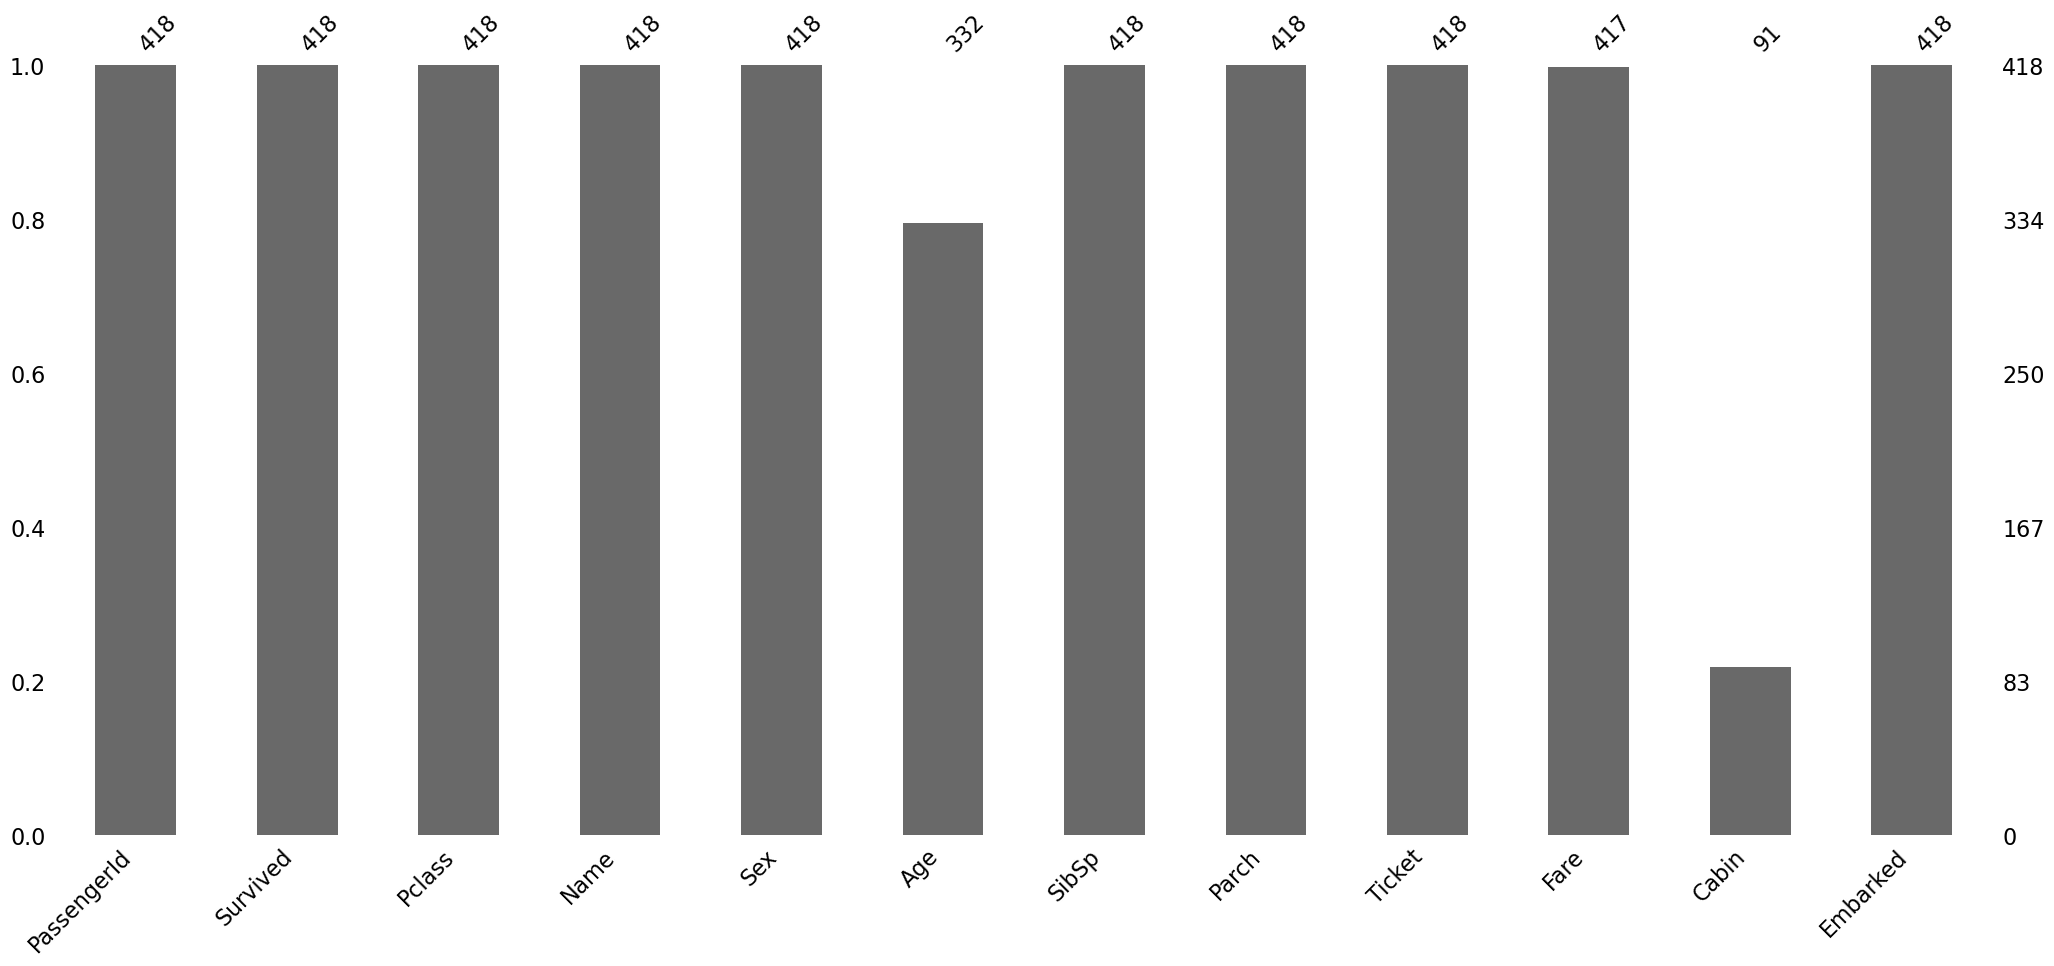

In [ ]:
import missingno

missingno.bar(df)

In [ ]:
df = df.drop(["PassengerId", "Ticket"], axis=1)

In [ ]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].strip().split(" ")[0])

common_titles = ["Mr.", "Miss.", "Mrs."]
df["Title"] = [0 if x in common_titles else 1 for x in df["Title"]]
df["Cabin"] = [0 if str(x) == "nan" else 1 for x in df["Cabin"]]

In [ ]:
embarked = pd.get_dummies(df["Embarked"])

In [ ]:
df = pd.concat([df, embarked], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,C,Q,S
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,Q,0,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,S,0,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,Q,0,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,S,0,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,S,0,0,0,1


In [ ]:
mean_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()
mean_dr = df[df["Name"].str.contains('Dr.', na=False)]['Age'].mean().round()

print("Mr: ", mean_mr)
print("Miss: ", mean_miss)
print("Mrs: ", mean_mrs)
print("Master: ", mean_master)
print("Dr: ", mean_dr)

Mr:  34.0
Miss:  22.0
Mrs:  39.0
Master:  7.0
Dr:  34.0


In [ ]:
ages = {
    "Mr.": 34.0,
    "Miss.": 22.0,
    "Mrs.": 39.0,
    "Master.": 7.0,
    "Dr.": 34.0
}

In [ ]:
def age(text):
    name = text[0]
    age = text[1]

    if pd.isnull(age):
        for k, v in ages.items():
            if k in name:
                return v

    else:
        return age

In [ ]:
df['Age'] = df[['Name', 'Age']].apply(age, axis=1)

In [ ]:
df.drop(["Name", "Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,C,Q,S
0,0,3,male,34.5,0,0,7.8292,0,0,0,1,0
1,1,3,female,47.0,1,0,7.0000,0,0,0,0,1
2,0,2,male,62.0,0,0,9.6875,0,0,0,1,0
3,0,3,male,27.0,0,0,8.6625,0,0,0,0,1
4,1,3,female,22.0,1,1,12.2875,0,0,0,0,1


In [ ]:
df = df.dropna(how="any")

<Axes: >

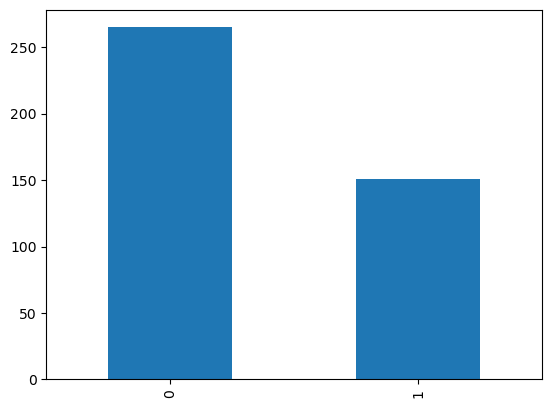

In [ ]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: >

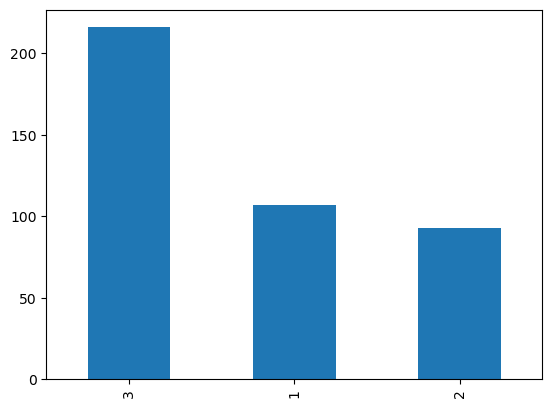

In [ ]:
df["Pclass"].value_counts().plot(kind="bar")

<Axes: ylabel='Sex'>

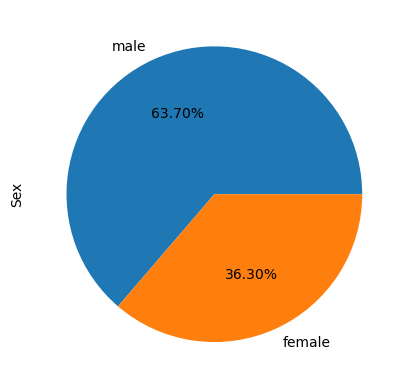

In [ ]:
df["Sex"].value_counts().plot(kind="pie", autopct="%.2f%%")

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Title'}>, <Axes: title={'center': 'C'}>],
       [<Axes: title={'center': 'Q'}>, <Axes: title={'center': 'S'}>,
        <Axes: >]], dtype=object)

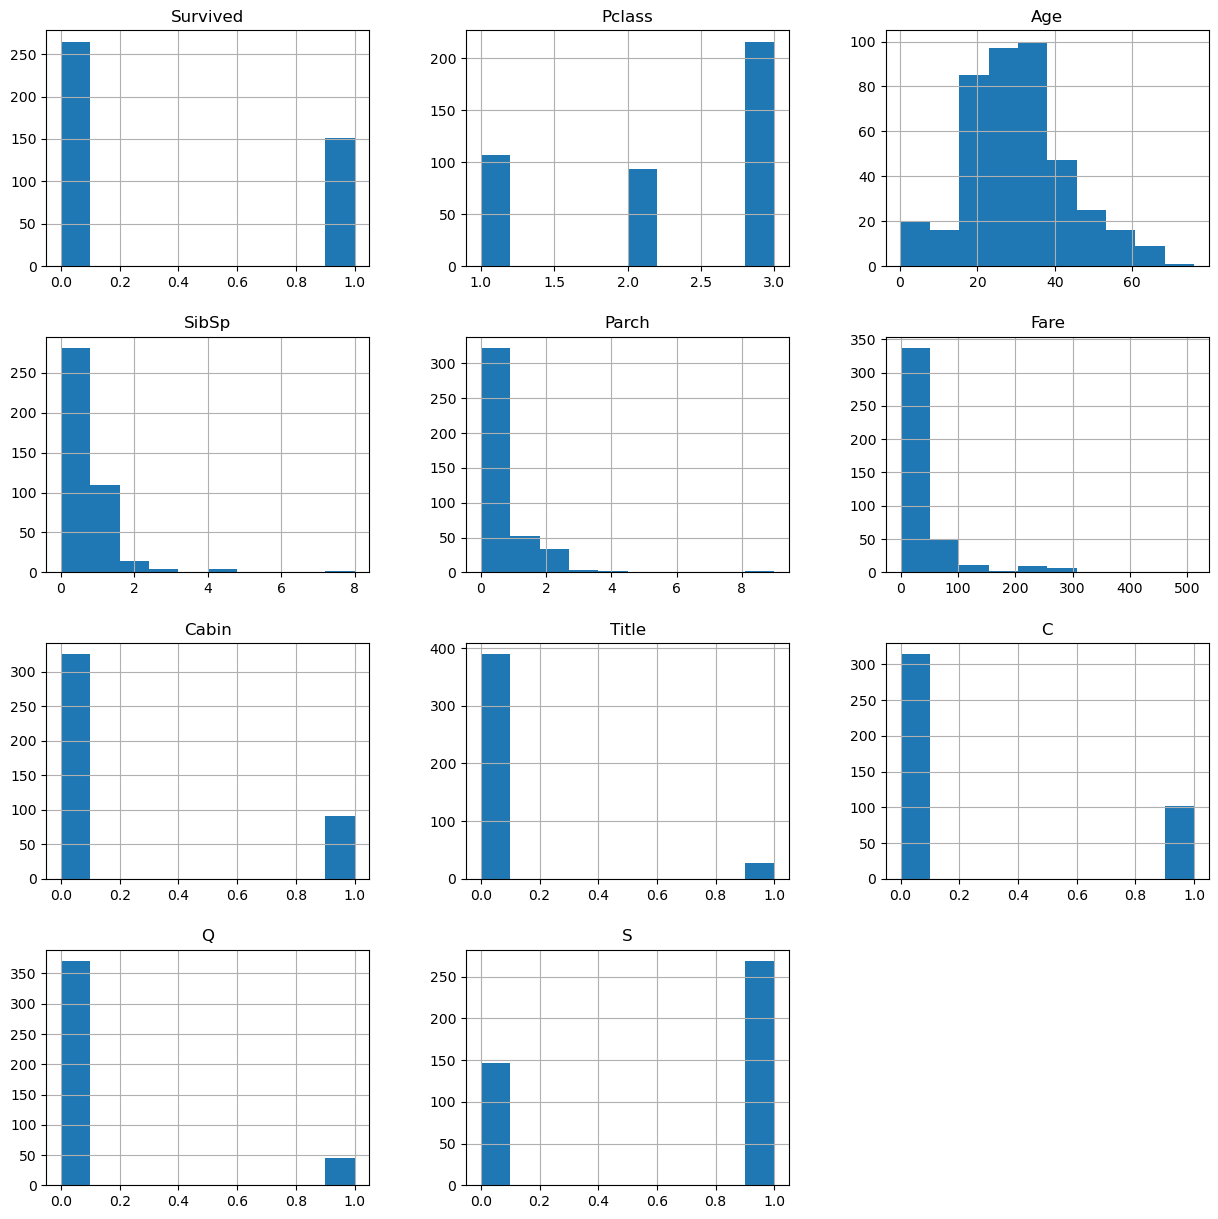

In [ ]:
df.hist(figsize=(15, 15))

In [ ]:
df["Sex"] = df["Sex"].map({
    "male": 0, "female": 1
})

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,C,Q,S
0,0,3,0,34.5,0,0,7.8292,0,0,0,1,0
1,1,3,1,47.0,1,0,7.0000,0,0,0,0,1
2,0,2,0,62.0,0,0,9.6875,0,0,0,1,0
3,0,3,0,27.0,0,0,8.6625,0,0,0,0,1
4,1,3,1,22.0,1,1,12.2875,0,0,0,0,1


In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0